In [21]:
## VISUALIZING DENSENET & VGG19

In [13]:
from torchvision import models
CUDA_VISIBLE_DEVICES = '6'

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

class Options():
    def __init__(self):
        self.lr = 0.003
        self.lr_decay = 10
        self.beta1 = 0.9
        
opt = Options()

class MyModel(nn.Module):
    def __init__(self, pretrained_model):
        self.pretrained_model = pretrained_model
        self.last_layer = ... # create layer

    def forward(self, x):
        return self.last_layer(self.pretrained_model(x))

pretrained_model = models.resnet18(pretrained=True)
model = MyModel(pretrained_model)

class Vgg19(models.vgg19()):
        
        def __init__(self):
                super(Vgg19, self).__init__()
        
        def initialize(self, opt):
#                 self = models.vgg19(pretrained=True)

                # setting the last layer
                num_ftrs = self.classifier._modules['6'].in_features
                self.classifier._modules['6'] = nn.Linear(num_ftrs, 2)
                
                self.optimizer = optim.Adam(self.parameters(), lr=opt.lr, betas=(opt.beta1, 0.999))
                self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=opt.lr_decay, gamma=0.1)
                
model = Vgg19()
model.initialize(opt)

AttributeError: cannot assign module before Module.__init__() call

In [15]:
import sys
from importlib import reload
sys.path.append('/media/dataserver/workspace/blanca/utils')
import libraries
import utils_global
reload(utils_global)

from utils_global import *
%matplotlib inline

## TESTING IN P2PHD DISCRIMINATOR
import torch
import torch.nn as nn
import functools
from networks import *
import sys
# project_models_path = '/media/dataserver/workspace/blanca/project/wip/pix2pixHDX-class-master/models'
# project_models_path = '/blanca/workspace/blanca/project/wip/pix2pixHDX-class-master/models'

di_v_path = '/media/dataserver/'
project_path = 'workspace/blanca/project/wip/pix2pixHDX-class-master'
sys.path.append(os.path.join(di_v_path, project_path))

# import models
from models import fitting_classifier
# from fitting_classifier 
from models.fitting_classifier import networks
reload(networks)
model_path_densenet = '/media/dataserver/workspace/blanca/project/wip/pix2pixHDX-class-master/models/fitting_classifier/checkpoints/testv1_bs512_do.2/C_net_loss_0.001614_acc_0.794788_1522613607.pth'
model_path_densenet = '/media/dataserver/workspace/blanca/project/wip/pix2pixHDX-class-master/models/fitting_classifier/checkpoints/testv1_bs512_do.2/C_net_loss_0.001614_acc_0.794788_1522613607.pth'
model_path_vgg = '/media/dataserver/workspace/blanca/project/wip/pix2pixHDX-class-master/models/fitting_classifier/checkpoints/testv1_bs512_do.2/C_net_loss_0.001614_acc_0.794788_1522613607.pth'

In [19]:
class Options():
    def __init__(self):
        self.batch_size= 512
        self.beta1= 0.9
        self.beta2= 0.999
        self.checkpoint_dir= 'checkpoints'
#         self.dataroot='/media/dataserver/workspace/blanca/training_datasets/pix2pix/'
#         self.dataset_list= ['images_target_clean_classified', 'video_target_clean_classified']
        self.drop_out= 0
        self.gpu_ids= [0]
#         self.isTrain=True
        self.lr= 0.001
        self.lr_decay= 15
        self.model= 'densenet'
        self.name= 'testv1_bs512_do.2'
        self.nc_input= 4
        self.nepochs= 30
        self.not_save= False
        self.nworkers= 64
        self.optimizer= 'adam'
        self.phase= 'train'
        self.phases= ['train', 'val']
        self.target_size= (224, 224)
        self.checkpoint_dir= '/media/dataserver/workspace/blanca/project/wip/pix2pixHDX-class-master/models/fitting_classifier/checkpoints/'
        self.checkpoint= 'testv1_bs512_do.2'
        
opt= Options()

if opt.model == 'densenet':
        model = networks.DenseNetMulti(nchannels=opt.nc_input, drop_rate=opt.drop_out)
        model.initialize(opt)
        
if opt.model == 'vgg19':
        model = networks.vgg19_bn(pretrained=True)
        model.initialize(opt)
        opt.nc_input = 3

if torch.cuda.is_available(): model = model#.cuda()
# print(model)

Classifier in features:  1024
Loaded C model @:  /media/dataserver/workspace/blanca/project/wip/pix2pixHDX-class-master/models/fitting_classifier/checkpoints/testv1_bs512_do.2/C_net_loss_0.001614_acc_0.794788_1522613607.pth


In [11]:
import torch.utils.data
from data.base_data_loader import BaseDataLoader

def CreateDataset(opt):
    dataset = None
    from data.aligned_dataset_custom import AlignedDataset
    import importlib
    import data
    importlib.reload(data)
    dataset = AlignedDataset()
    dataset.initialize(opt)
    print("dataset [%s] was created" % (dataset.name()))
    return dataset

# class CustomDatasetDataLoader(BaseDataLoader):
#     def name(self):
#         return 'CustomDatasetDataLoader'

#     def initialize(self, opt):
#         BaseDataLoader.initialize(self, opt)
#         self.dataset = CreateDataset(opt)
#         self.dataloader = torch.utils.data.DataLoader(
#             self.dataset,
#             batch_size=opt.batchSize,
#             shuffle=not opt.serial_batches,
#             num_workers=int(opt.nThreads))

#     def load_data(self):
#         return self.dataloader

#     def __len__(self):
#         return min(len(self.dataset), self.opt.max_dataset_size)
    
# def CreateDataLoader(opt):
#     from data.custom_dataset_data_loader import CustomDatasetDataLoader
#     data_loader = CustomDatasetDataLoader()
#     print(data_loader.name())
#     data_loader.initialize(opt)
#     return data_loader


class OptionsP2P():
    def __init__(self):
        self.batchSize = 1
        self.dataroot = '/media/dataserver/workspace/blanca/training_datasets/pix2pix/'
        self.dataset_list = ['images_target_clean_classified', 'video_target_clean_classified']
        self.isTrain = True
        self.label_nc = 0
        self.output_nc = 3
        self.loadSize = 256
        self.fill = 'W'
        self.no_lsgan = False
        self.serial_batches = False
        self.nThreads = 16
        self.max_dataset_size = 10e10

opt_data = OptionsP2P()
dataset = CreateDataset(opt_data)
print('#training images = %d' % len(dataset))

# data_loader = CreateDataLoader(opt_data)
# dataset = data_loader.load_data()
# dataset_size = len(data_loader)
# print('#training images = %d' % dataset_size)

shuffling...done
shuffling...done
shuffling...done
2180
Total found IDs in path /media/dataserver/workspace/blanca/training_datasets/pix2pix/video_target_clean_classified/good_fit: 49 .. and selected 2 per ID
shuffling...done
2284
dataset [AlignedDataset] was created
#training images = 2284


input <class 'torch.FloatTensor'>
inst <class 'int'>
target <class 'torch.FloatTensor'>
feat <class 'int'>
target4C <class 'torch.FloatTensor'>
input_mask <class 'numpy.ndarray'>
path <class 'str'>
label <class 'torch.FloatTensor'>
(256, 256, 3) (256, 256, 3) (256, 256)


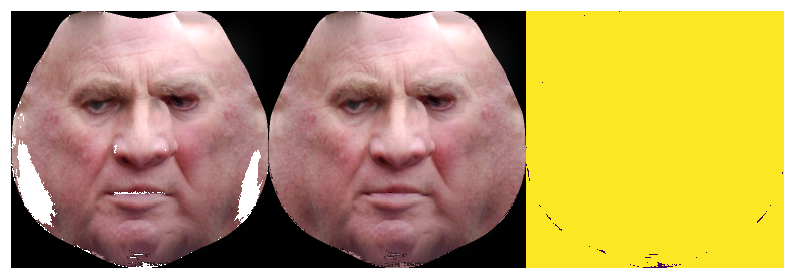

In [20]:
## VISUALIZING DATA
x = dataset.__get_x_item__(0)
for k, v in x.items(): print(k, type(v))

im_input = ((x['input'].numpy().transpose((1, 2, 0)) / 2) + 0.5) * 255
im_target = ((x['target'].numpy().transpose((1, 2, 0)) / 2) + 0.5) * 255
im_mask = x['input_mask']

print(im_input.shape, im_target.shape, im_mask.shape)
plot_ims([im_input, im_target, im_mask], alpha=True)

In [23]:
target4C = ((x['target4C'].numpy().transpose((1, 2, 0)) / 2) + 0.5) * 255
# plot_im(target4C[:,:,:3])

densenet_input_var = Variable(x['target4C'], requires_grad=True) #.cuda()
print(densenet_input_var.shape)

x = densenet_input_var
x_ = x.expand(1, x.shape[0], x.shape[1], x.shape[2])
print(type(x_), x_.shape)

features = model.cpu().features(x_)

torch.Size([4, 224, 224])
<class 'torch.autograd.variable.Variable'> torch.Size([1, 4, 224, 224])


[ 0.] [ 5.44632959] torch.Size([1, 1024, 7, 7])
[ 0.17074752] [ 0.56914681] torch.Size([1, 1, 7, 7])
[ 0.17076245] [ 0.56261456] torch.Size([1, 1, 70, 70])
43.5444 143.467 (70, 70)


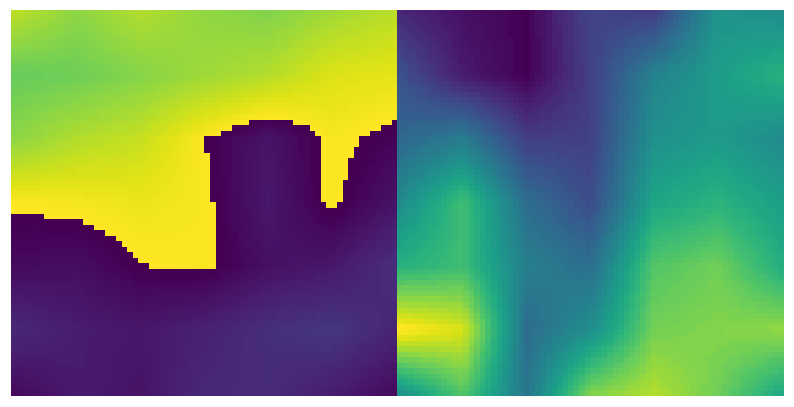

In [80]:
## CAM
model.eval()
am = model.features(x_)
avg_am = am.mean(1, keepdim=True)
up_avg_am = torch.nn.Upsample(scale_factor=10, mode="bilinear")(avg_am)
im_avg_am = up_avg_am.cpu().data.numpy()[0][0] * 255

# last_map = avg_out_s0[4]

# print(am.shape, avg_am.shape)


## After RELU
model.eval()
am = model.features(x_)
am_r = torch.nn.functional.relu(am, inplace=True)
print(am_r.min().data.numpy(), am_r.max().data.numpy(), am_r.shape)
avg_am_r = am_r.mean(1, keepdim=True)
# avg_am_r = torch.nn.functional.avg_pool2d(am_r, kernel_size=7, stride=1)
print(avg_am_r.min().data.numpy(), avg_am_r.max().data.numpy(), avg_am_r.shape)

up_avg_am_r = torch.nn.Upsample(scale_factor=10, mode="bilinear")(avg_am_r)
print(up_avg_am_r.min().data.numpy(), up_avg_am_r.max().data.numpy(), up_avg_am_r.shape)

im_avg_am_r = up_avg_am_r.cpu().data.numpy()[0][0] * 255
print(np.min(im_avg_am_r), np.max(im_avg_am_r), im_avg_am_r.shape)

plot_ims([im_avg_am, im_avg_am_r])

In [ ]:
[ 0.01542744] [ 1.09600306] # 37.6915 37.6915
[ 0.17074752] [ 0.56914681] # 43.5444 143.467

In [96]:
## PREPARE INPUT
target_image = Variable(Variable(x['target']).data.cuda())
target_image_mask = Variable(torch.cuda.FloatTensor(Variable(x['input_mask']).data.float().unsqueeze(0).cuda()))

RuntimeError: Variable data has to be a tensor, but got numpy.ndarray

In [ ]:
## DATA TRANSFORMS DENSENET
transform = transforms.Compose([
                    transforms.Lambda(lambda x: np.transpose(x, (1, 2, 0))),
                    transforms.Lambda(lambda x: resize_image_OpenCV(x, (224, 224))), 
                    transforms.Lambda(lambda x: np.transpose(x, (2, 0, 1))),
                    transforms.Lambda(lambda x: np.expand_dims(x, axis=0)),
                ])

transform_mask = transforms.Compose([
                    # transforms.Lambda(lambda x: deb(x)),
                    transforms.Lambda(lambda x: resize_image_OpenCV(x, (224, 224))), 
                    # transforms.Lambda(lambda x: deb(x)),
                    transforms.Lambda(lambda x: np.expand_dims(x, axis=0)),
                    transforms.Lambda(lambda x: np.expand_dims(x, axis=0)),
                    # transforms.Lambda(lambda x: deb(x)),
                ])


target_image = Variable(x['target'], requires_grad=True)
target_image_mask = Variable(torch.cuda.FloatTensor(x['input_mask'].float().unsqueeze(0).cuda()))

print(target_image.shape, target_image_mask.shape)

target_image_transform = transform(target_image.data.cpu().squeeze().numpy())
target_image_resized = Variable(torch.cuda.FloatTensor(target_image_transform))

target_image_mask_transform = transform_mask(target_image_mask.data.cpu().squeeze().numpy())
target_image_mask_resized = Variable(torch.cuda.FloatTensor(target_image_mask_transform))                

input_densenet = torch.cat((target_image_resized, target_image_mask_resized), dim=1)
print('input_densenet shape: ', input_densenet.shape)  

In [ ]:
densenet_datatransforms = transforms.Compose([
            transforms.Lambda(lambda x: split_hstack(x, nchannels)),
            transforms.Lambda(lambda x: resize_opencv(x, target_size)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])

HERE HERE HERE [[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]
input
inst
target
feat
target4C
input_mask
path
label
(256, 256, 3) (256, 256, 3) (256, 256)


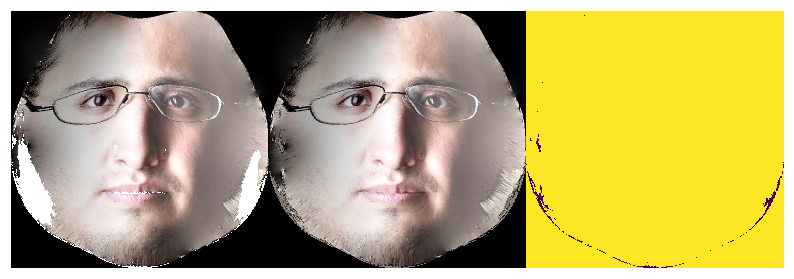

In [7]:
x = dataset.__get_x_item__(5)
for k, v in x.items(): print(k)

im_input = ((x['input'].numpy().transpose((1, 2, 0)) / 2) + 0.5) * 255
im_target = ((x['target'].numpy().transpose((1, 2, 0)) / 2) + 0.5) * 255
im_mask = x['input_mask']

print(im_input.shape, im_target.shape, im_mask.shape)
plot_ims([im_input, im_target, im_mask], alpha=True)

## DATA
x_input = x['input'].expand(1, x['input'].shape[0], x['input'].shape[1], x['input'].shape[2])
x_input_var = Variable(x_input, requires_grad=True).cuda()

x_target = x['target'].expand(1, x['target'].shape[0], x['target'].shape[1], x['target'].shape[2])
x_target_var = Variable(x_target, requires_grad=True).cuda()

# x_mask = x['input_mask'].expand(1, )

input_D = torch.cat((x_input, x_target), dim=1)
input_D_var = Variable(input_D, requires_grad=True).cuda()

# input_densenet = torch.cat((x_target, im_mask), dim=1)
# input_densenet_var = Variable(input_densenet, requires_grad=True).cuda()
# print(type(input_densenet_var), input_densenet_var.shape)

## 1. Weighted Class Activation Map
https://github.com/dimkastan/ATA-GAN/blob/master/DemoATAGan.py

In [31]:
for i in range(100):
    x = dataset.__get_x_item__(i)

    densenet_input_var = Variable(x['target4C'], requires_grad=True) #.cuda()
    x = densenet_input_var
    x_ = x.expand(1, x.shape[0], x.shape[1], x.shape[2])

    out = model(x_)
    print(out)
    outsm = torch.nn.functional.sigmoid(out)
    print(outsm)


Variable containing:
-7.2923  7.4705
[torch.FloatTensor of size 1x2]

Variable containing:
 0.0007  0.9994
[torch.FloatTensor of size 1x2]

Variable containing:
 2.8693 -2.9395
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9463  0.0502
[torch.FloatTensor of size 1x2]

Variable containing:
-5.4950  5.6265
[torch.FloatTensor of size 1x2]

Variable containing:
 0.0041  0.9964
[torch.FloatTensor of size 1x2]

Variable containing:
-4.2601  4.3395
[torch.FloatTensor of size 1x2]

Variable containing:
 0.0139  0.9871
[torch.FloatTensor of size 1x2]

Variable containing:
-0.1151  0.1516
[torch.FloatTensor of size 1x2]

Variable containing:
 0.4712  0.5378
[torch.FloatTensor of size 1x2]

Variable containing:
-2.6298  2.7531
[torch.FloatTensor of size 1x2]

Variable containing:
 0.0672  0.9401
[torch.FloatTensor of size 1x2]

Variable containing:
-2.4817  2.5310
[torch.FloatTensor of size 1x2]

Variable containing:
 0.0771  0.9263
[torch.FloatTensor of size 1x2]

Variable containing:

Variable containing:
-3.7577  3.8832
[torch.FloatTensor of size 1x2]

Variable containing:
 0.0228  0.9798
[torch.FloatTensor of size 1x2]

Variable containing:
 1.8122 -1.8190
[torch.FloatTensor of size 1x2]

Variable containing:
 0.8596  0.1396
[torch.FloatTensor of size 1x2]

Variable containing:
-0.4394  0.4947
[torch.FloatTensor of size 1x2]

Variable containing:
 0.3919  0.6212
[torch.FloatTensor of size 1x2]

Variable containing:
-1.0198  1.0276
[torch.FloatTensor of size 1x2]

Variable containing:
 0.2651  0.7364
[torch.FloatTensor of size 1x2]

Variable containing:
 6.0650 -5.9459
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9977  0.0026
[torch.FloatTensor of size 1x2]

Variable containing:
 5.3234 -5.2797
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9951  0.0051
[torch.FloatTensor of size 1x2]

Variable containing:
 1.3046 -1.2902
[torch.FloatTensor of size 1x2]

Variable containing:
 0.7866  0.2158
[torch.FloatTensor of size 1x2]

Variable containing:

In [45]:
model.eval()
# CHECK
print(model(x_))

out = model.features(x_)
out = torch.nn.functional.relu(out, inplace=True)
out = torch.nn.functional.avg_pool2d(out, kernel_size=7, stride=1).view(features.size(0), -1)
out = model.classifier(out)

print(out)
outsm = torch.nn.functional.sigmoid(out)
print(outsm)

Variable containing:
-2.4830  2.6258
[torch.FloatTensor of size 1x2]

Variable containing:
-2.4830  2.6258
[torch.FloatTensor of size 1x2]

Variable containing:
 0.0771  0.9325
[torch.FloatTensor of size 1x2]



In [46]:
x = model.features(x_)
out = torch.nn.functional.relu(x, inplace=True)
out = torch.nn.functional.avg_pool2d(out, kernel_size=7, stride=1).view(out.size(0), -1)
out = model.classifier(out)
print('classifier output ', out.data.numpy())

outsm = torch.nn.functional.sigmoid(out)
print('classifier output sig ', outsm.data.numpy())

print('classifier layer weights shape: ', Variable(model.classifier.weight.data).shape)
# weights weighted by the classification output 
# here we multiply the output of the sigmoid for each class to the weights of the linear function (1024) for each class
w = torch.mm(outsm, Variable(model.classifier.weight.data))
print('weighted weights shape', w.shape)

# weighted class activation map before the avg. pooling
wcam = torch.mul(x, w.unsqueeze(2).unsqueeze(3))
print(x.shape, w.unsqueeze(2).unsqueeze(3).shape)
wcam = wcam.sum(1).unsqueeze(1)
print('weighted cam shape ', wcam.shape)

up_wcam = torch.nn.Upsample(scale_factor = 10, mode = "bilinear")(wcam)

print("outputCAM (upsampled weighted cam) shape ", up_wcam.shape)

# plot_im(up_wcam.data.numpy()[0][0])

classifier output  [[-2.48304677  2.62580895]]
classifier output sig  [[ 0.07705525  0.9325043 ]]
classifier layer weights shape:  torch.Size([2, 1024])
weighted weights shape torch.Size([1, 1024])
torch.Size([1, 1024, 7, 7]) torch.Size([1, 1024, 1, 1])
weighted cam shape  torch.Size([1, 1, 7, 7])
outputCAM (upsampled weighted cam) shape  torch.Size([1, 1, 70, 70])


In [49]:
# can we plot wcam at different points? I NEED TO ITERATE OVER ALL LAYERS --TO DO IF NEEDED 
def get_am_weights(input_tensor, model):
    
#     gradients = {}
#     def save_gradient(layer_name): 
#         def save(grad):
#             gradients[layer_name] = grad
#         return save

    layer_output = {}
    layer_weights = {}

    model = model.cpu()
    out = input_tensor
    for k, v in model._modules.items():
        if k == 'features':
            for i, j in model.features._modules.items():
                out = model.features._modules[i](out)
                print(i, isinstance(j, torch.nn.modules.activation.ReLU))
                if not isinstance(j, (torch.nn.modules.activation.ReLU, torch.nn.modules.MaxPool2d)): 
#                     if module.weight is not None: print(module.weight.shape)
                    layer_output[i] = out
                    layer_weights[i] = model.features._modules[i].weight.data

#         elif k == 'classifier':
#             out = torch.nn.functional.relu(out, inplace=True)
#             out.register_hook(save_gradient(k + '_beforeAvgPool'))
#             chp_output[k + '_beforeAvgPool'] = out
#             out = torch.nn.functional.avg_pool2d(out, kernel_size=7, stride=1)

#             out = out.view(features.size(0), -1)
#             out = model.classifier(out)
    
    return layer_output, layer_weights

lo, lw = get_am_weights(x_, model)
lo

conv0 False
norm0 False
relu0 True
pool0 False
denseblock1 False


AttributeError: '_DenseBlock' object has no attribute 'weight'

In [50]:
outsm = torch.nn.functional.sigmoid(out)
print('classifier output sig ', outsm.data.numpy())

# weights weighted by the classification output 
# here we multiply the output of the sigmoid for each class to the weights of the linear function (1024) for each class
w = torch.mm(outsm, Variable(model.classifier.weight.data))
print('weighted weights shape', w.shape)

classifier output sig  [[ 0.07705525  0.9325043 ]]
weighted weights shape torch.Size([1, 1024])


## 2. Activation Maps (AM) and Class AM at different points
https://github.com/utkuozbulak/pytorch-cnn-visualizations/blob/master/src/guided_gradcam.py

In [51]:
import collections
from collections import OrderedDict
# LIST ALL DENSE LAYERS'S BLOCKS (BN + RELU + CONV2 + BN + RELU + CONV2)
layer_list = [name.split('.' + name.split('.')[-1])[0] for name, param in model.state_dict().items()]

layer_list_set = []
for i in layer_list:
    if i not in layer_list_set: layer_list_set.append(i)

layerB_list = []
for i in layer_list_set:
    if i[:19] == 'features.denseblock':
        dl = i.split('.')[0] + '.' + i.split('.')[1] + '.' + i.split('.')[2]
        if dl not in layerB_list: layerB_list.append(dl)
    else: layerB_list.append(i)

B_list = []
for i in layerB_list:
    if i[:19] in ['features.denseblock', 'features.transition']:
        dl = i.split('.')[0] + '.' + i.split('.')[1]
        if dl not in B_list: B_list.append(dl)
    else: B_list.append(i)
        
B_list
# ## MODEL FORWARD PASS
# chp_output = {}

# model = model.cpu()
# out = x_
# for i in B_list:
#     print(i)
#     if i.split('.')[0] == 'features':
#         j = i.split('features.')[-1]
#         out = model._modules['features']._modules[j](out)

['features.conv0',
 'features.norm0',
 'features.denseblock1',
 'features.transition1',
 'features.denseblock2',
 'features.transition2',
 'features.denseblock3',
 'features.transition3',
 'features.denseblock4',
 'features.norm5',
 'classifier']

In [52]:
module_layers = []
for i, j in model.features._modules.items():
    print(i)

conv0
norm0
relu0
pool0
denseblock1
transition1
denseblock2
transition2
denseblock3
transition3
denseblock4
norm5


In [53]:
## FULL FORWARD PASS

gradients = {}
def save_gradient(layer_name): 
    def save(grad):
        gradients[layer_name] = grad
    return save

chp_output = {}

model = model.cpu()
out = x_
for k, v in model._modules.items():
    if k == 'features':
        for i, j in model.features._modules.items():
            out = model.features._modules[i](out)
            out.register_hook(save_gradient(i))
            chp_output[i] = out
            
    elif k == 'classifier':
        out = torch.nn.functional.relu(out, inplace=True)
        out.register_hook(save_gradient(k + '_beforeAvgPool'))
        chp_output[k + '_beforeAvgPool'] = out
        out = torch.nn.functional.avg_pool2d(out, kernel_size=7, stride=1)

        out = out.view(features.size(0), -1)
        out = model.classifier(out)

print(out)

## BACKWARDs PASS
# positive label: good fit
model.features.zero_grad()
model.classifier.zero_grad()

label = Variable(torch.ones((1, 1))) #.cuda()
y_ = label.data.long()
y = y_.view(len(y_), 1)
y_onehot = torch.FloatTensor(len(y), 2).zero_().scatter_(1, y, 1)
label_onehot = Variable(y_onehot)#.cuda()
label = label_onehot
out.backward(gradient=label, retain_graph=True)

# for k, v in gradients.items(): print(k)
# for k, v in chp_output.items(): print(k)

Variable containing:
-2.4830  2.6258
[torch.FloatTensor of size 1x2]



In [56]:
## FULL FORWARD PASS

def get_gradients(inp, label, model):
    
    gradients = {}
    def save_gradient(layer_name): 
        def save(grad):
            gradients[layer_name] = grad
        return save

    chp_output = {}

    model = model.cpu()
    out = inp
    for k, v in model._modules.items():
        if k == 'features':
            for i, j in model.features._modules.items():
                out = model.features._modules[i](out)
                out.register_hook(save_gradient(i))
                chp_output[i] = out

        elif k == 'classifier':
            out = torch.nn.functional.relu(out, inplace=True)
            out.register_hook(save_gradient(k + '_beforeAvgPool'))
            chp_output[k + '_beforeAvgPool'] = out; print(out.shape)
            out = torch.nn.functional.avg_pool2d(out, kernel_size=7, stride=1)
            print(out.shape)
            out = out.view(features.size(0), -1)
            out = model.classifier(out)
    
    out.backward(gradient=label, retain_graph=True)
    return out, chp_output, gradients

## GETTING AMs, CAMs

# positive label: good fit
model.features.zero_grad()
model.classifier.zero_grad()

label = Variable(torch.ones((1, 1))) #.cuda()
y_ = label.data.long()
y = y_.view(len(y_), 1)
y_onehot = torch.FloatTensor(len(y), 2).zero_().scatter_(1, y, 1)
label_onehot = Variable(y_onehot)#.cuda()
label = label_onehot

out_pos, chp_output_pos, gradients_pos = get_gradients(x_, label_onehot, model)

# negative label: bad fit
model.features.zero_grad()
model.classifier.zero_grad()
        
label = Variable(torch.zeros((1, 1))) #.cuda()
y_ = label.data.long()
y = y_.view(len(y_), 1)
y_onehot = torch.FloatTensor(len(y), 2).zero_().scatter_(1, y, 1)
label_onehot = Variable(y_onehot)#.cuda()
label = label_onehot

out_neg, chp_output_neg, gradients_neg = get_gradients(x_, label_onehot, model)

# for k, v in gradients.items(): print(k)
# for k, v in chp_output.items(): print(k)

torch.Size([1, 1024, 7, 7])
torch.Size([1, 1024, 1, 1])
torch.Size([1, 1024, 7, 7])
torch.Size([1, 1024, 1, 1])


Visualizing cam @layer:  classifier_beforeAvgPool


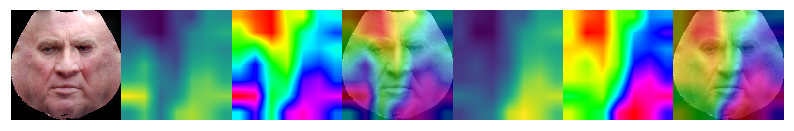

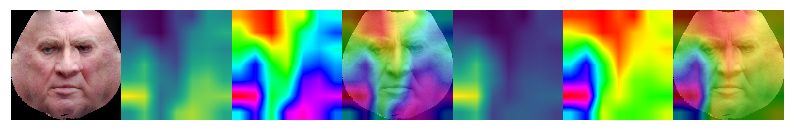

Visualizing cam @layer:  norm5


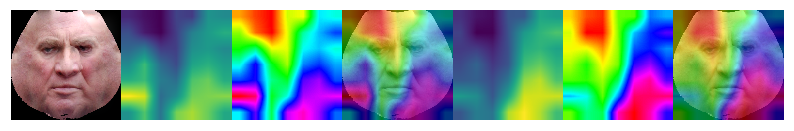

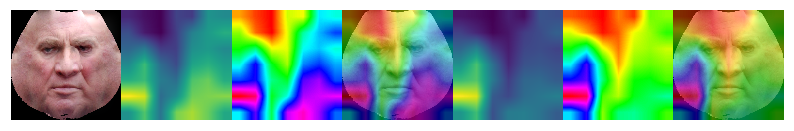

Visualizing cam @layer:  denseblock4


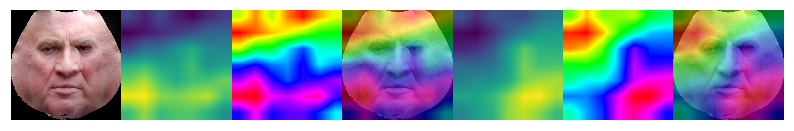

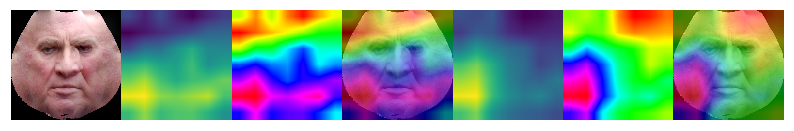

Visualizing cam @layer:  transition3


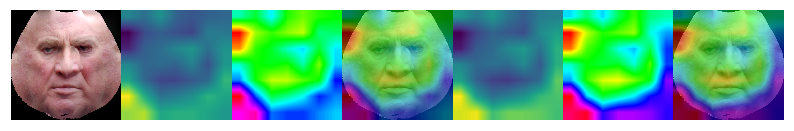

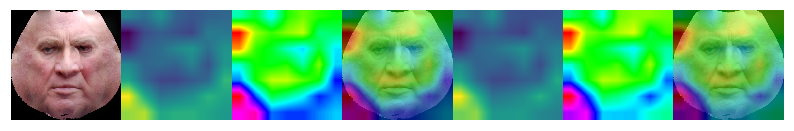

Visualizing cam @layer:  denseblock3


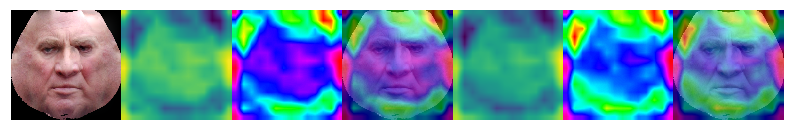

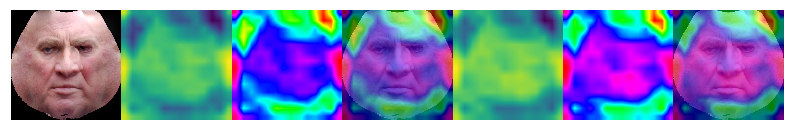

Visualizing cam @layer:  transition2


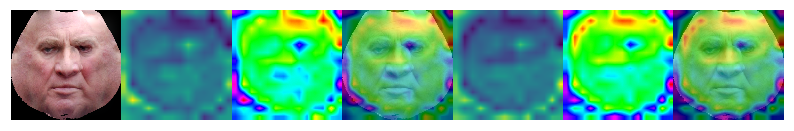

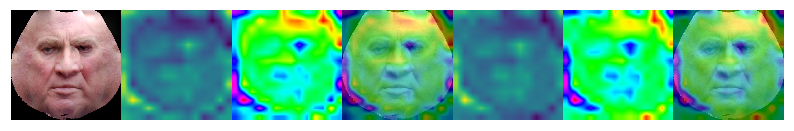

Visualizing cam @layer:  denseblock2


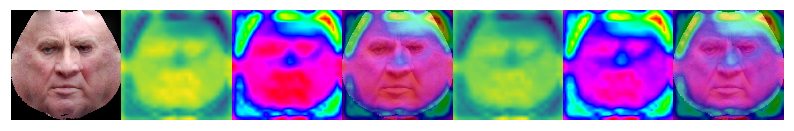

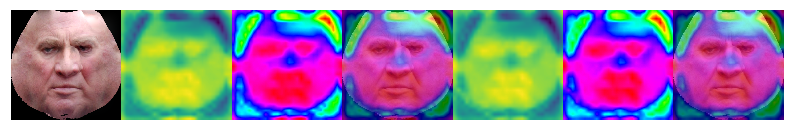

Visualizing cam @layer:  transition1


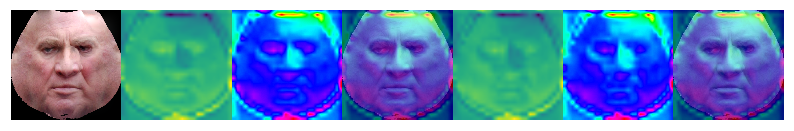

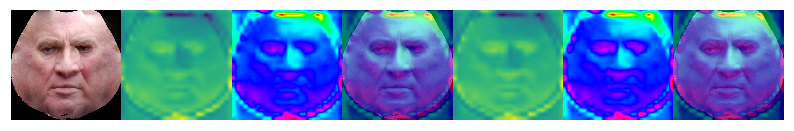

Visualizing cam @layer:  denseblock1


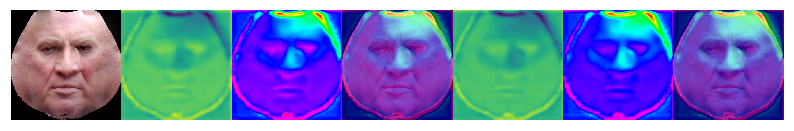

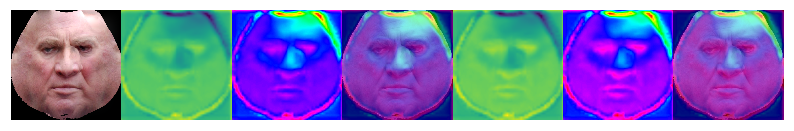

Visualizing cam @layer:  pool0


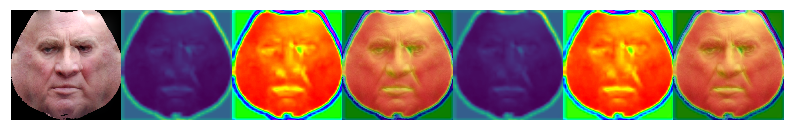

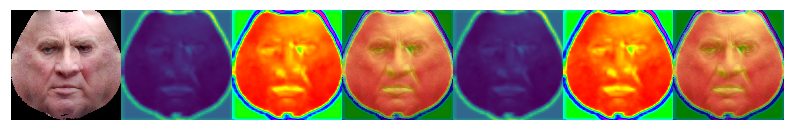

Visualizing cam @layer:  relu0


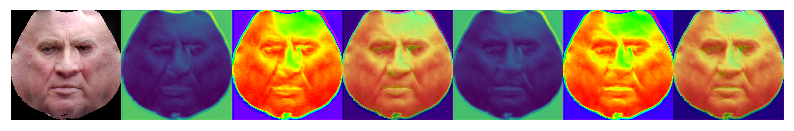

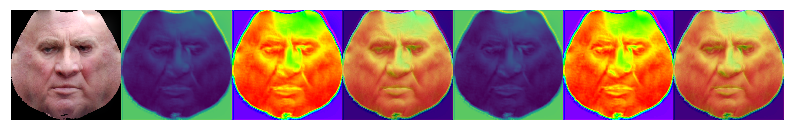

Visualizing cam @layer:  norm0


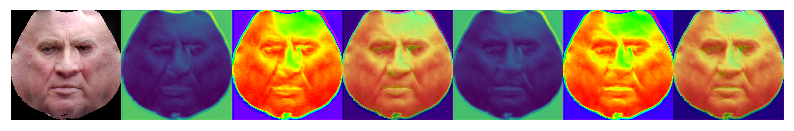

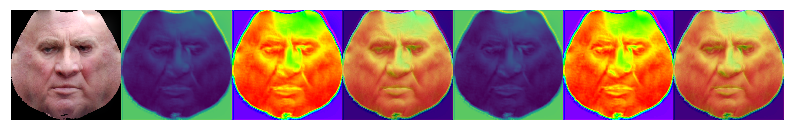

Visualizing cam @layer:  conv0


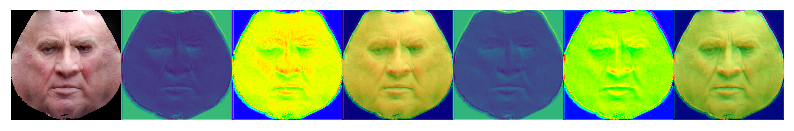

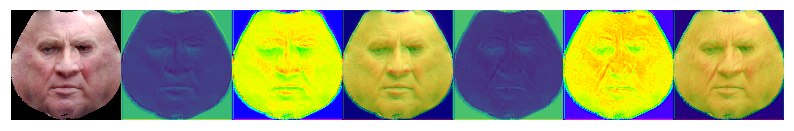

In [43]:
def get_visuals(m, im):
    m_color = cv2.applyColorMap(m, cv2.COLORMAP_HSV)
    im_with_m_color = np.float32(m_color) + np.float32(im) 
    im_with_m_color = (im_with_m_color / np.max(im_with_m_color)) * 255
    return m_color, im_with_m_color

def prepare_for_visuals(m):
    m = cv2.resize(m, (224, 224))
#     m = np.maximum(m, 0)
    m = (m - np.min(m)) / (np.max(m) - np.min(m))  # Normalize between 0-1
    m = np.uint8(m * 255)  # Scale between 0-255 to visualize
    return m

def vis_am_cam(gradients_chps_list, input_tensor, scale_weights=True):
    """
    Input: list of gradients dictionary/ies (assuming same keys in both)
    """
    for layer_name in gradients_chps_list[0][0].keys():
        print('Visualizing cam @layer: ', layer_name)
        
        for (gradients, chp_output) in gradients_chps_list:
            # NOTICE THIS IS AM WEIGHTED BY GRADIENTS -WE'RE NOT USING LAYERS WEIGHTS! 
            target = chp_output[layer_name].data.numpy()[0]
            am = np.mean(target, axis=0)
            guided_gradients = gradients[layer_name].data.numpy()[0]
            weights = np.mean(guided_gradients, axis=(1, 2))  # Take averages for each gradient
            # rescale gradients between 0 and 1 (I was facing vanishing gradient problem on the pretrained densenet) 
            n_weights = (weights - np.min(weights)) / (np.max(weights) - np.min(weights))
            cam = np.ones(target.shape[1:], dtype=np.float32)
            # multiply each weight with its conv output and then, sum
            for i, w in enumerate(n_weights):
                cam += w * target[i, :, :]

            # prepare data for visuals
            im = ((input_tensor.data.numpy()[0].transpose((1, 2, 0))[:,:,:3] / 2) + 0.5) * 255
            am = prepare_for_visuals(am)
            cam = prepare_for_visuals(cam)

            # visuals
            am_color, im_with_am_color = get_visuals(am, im)
            cam_color, im_with_cam_color = get_visuals(cam, im)

            ims = [im, am, am_color, im_with_am_color, cam, cam_color, im_with_cam_color]
            plot_ims(ims)

vis_am_cam([(gradients_pos, chp_output_pos), (gradients_neg, chp_output_neg)], x_)

Visualizing cam @layer:  classifier_beforeAvgPool


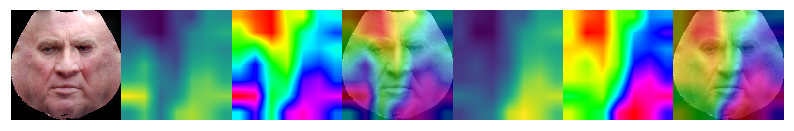

Visualizing cam @layer:  norm5


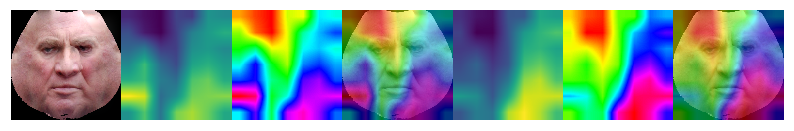

Visualizing cam @layer:  denseblock4


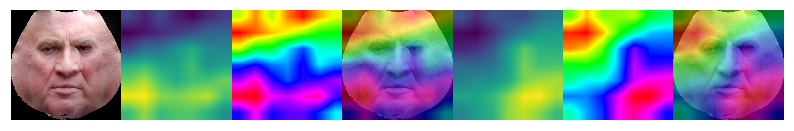

Visualizing cam @layer:  transition3


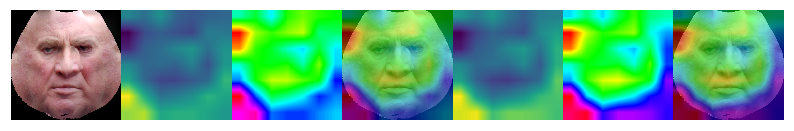

Visualizing cam @layer:  denseblock3


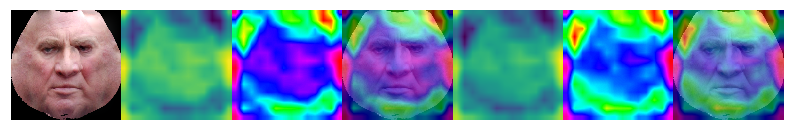

Visualizing cam @layer:  transition2


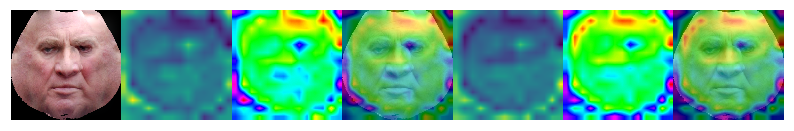

Visualizing cam @layer:  denseblock2


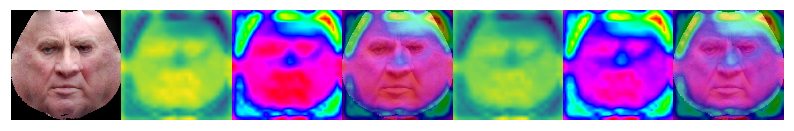

Visualizing cam @layer:  transition1


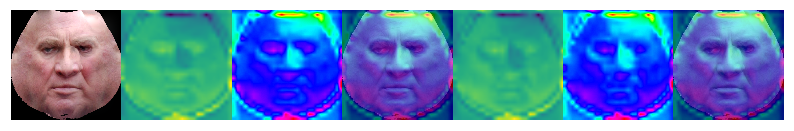

Visualizing cam @layer:  denseblock1


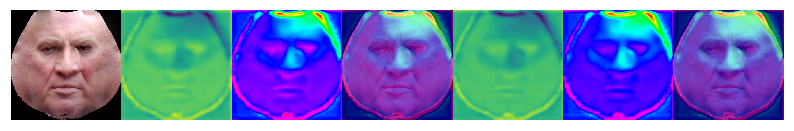

Visualizing cam @layer:  pool0


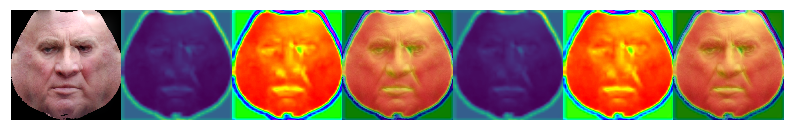

Visualizing cam @layer:  relu0


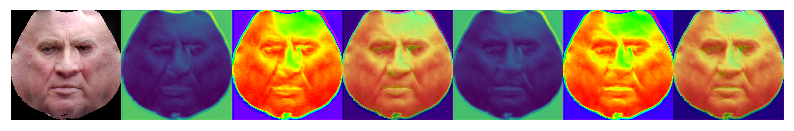

Visualizing cam @layer:  norm0


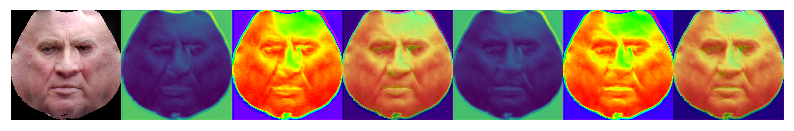

Visualizing cam @layer:  conv0


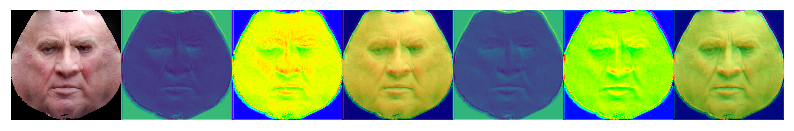

In [44]:
def get_visuals(m):
    m_color = cv2.applyColorMap(m, cv2.COLORMAP_HSV)
    im_with_m_color = np.float32(m_color) + np.float32(im) 
    im_with_m_color = (im_with_m_color / np.max(im_with_m_color)) * 255
    return m_color, im_with_m_color

def prepare_for_visuals(m):
#     print('cam (mean of gradients * am): ', np.min(cam), np.max(cam))
#     print('cam shape: ', cam.shape) # cam shape:  (112, 112)
    m = cv2.resize(m, (224, 224))
#     print('cam (mean of gradients * am): ', np.min(cam), np.max(cam))
#     m = np.maximum(m, 0)
#     print('cam (mean of gradients * am): ', np.min(cam), np.max(cam))
    m = (m - np.min(m)) / (np.max(m) - np.min(m))  # Normalize between 0-1
#     print('cam (mean of gradients * am): ', np.min(cam), np.max(cam))
    m = np.uint8(m * 255)  # Scale between 0-255 to visualize
#     print('cam (mean of gradients * am): ', np.min(cam), np.max(cam))
#     print('cam shape: ', cam.shape)
    return m

for i in gradients.keys():
    print('Visualizing cam @layer: ', i)
#     print('Layer gradients shape: ', gradients[i].shape)
#     print('First layer output shape: ', chp_output[i].shape)
    
    # Get convolution outputs: activation map
    target = chp_output[i].data.numpy()[0]
    am = np.mean(target, axis=0)
#     print('am', np.min(target), np.max(target), target.shape)

    # Get hooked gradients (on the specific layer)
    guided_gradients = gradients[i].data.numpy()[0]
#     print('guided_gradients: ', np.min(guided_gradients), np.max(guided_gradients))

    # Get weights from gradients
    weights = np.mean(guided_gradients, axis=(1, 2))  # Take averages for each gradient
#     print('weights (mean of gradients)', np.min(weights), np.max(weights))
#     print('weights shape: ', weights.shape) # weights shape:  (64,)
    n_weights = (weights - np.min(weights)) / (np.max(weights) - np.min(weights))
#     print('norm weights (mean of gradients)', np.min(n_weights), np.max(n_weights))

    # Create empty numpy array for cam
    cam = np.ones(target.shape[1:], dtype=np.float32)
    # Multiply each weight with its conv output and then, sum
    for i, w in enumerate(n_weights):
        cam += w * target[i, :, :]
    
    ## VISUALS
    # prepare data
    im = ((x_.data.numpy()[0].transpose((1, 2, 0))[:,:,:3] / 2) + 0.5) * 255
    am = prepare_for_visuals(am)
    cam = prepare_for_visuals(cam)
    
    # get additional visuals
    am_color, im_with_am_color = get_visuals(am)
    cam_color, im_with_cam_color = get_visuals(cam)
    
    ims = [im, am, am_color, im_with_am_color, cam, cam_color, im_with_cam_color]
    plot_ims(ims)

In [77]:
# CHECK & LOSS

# CHECK
# ------
features = model.features(x_)
out = torch.nn.functional.relu(features, inplace=True)
out = torch.nn.functional.avg_pool2d(out, kernel_size=7, stride=1).view(features.size(0), -1)
out = model.classifier(out)
# ------

model_output = model(x_)
print(model_output)

model_output_sig = torch.nn.functional.sigmoid(model_output)
print(model_output_sig)

label = Variable(torch.ones((1, 1))) #.cuda()
y_ = label.data.long()
y = y_.view(len(y_), 1)
y_onehot = torch.FloatTensor(len(y), 2).zero_().scatter_(1, y, 1)
label_onehot = Variable(y_onehot)#.cuda()

loss0 = torch.nn.BCEWithLogitsLoss()(model_output, label_onehot)

loss1 = torch.nn.BCELoss()(model_output_sig, label_onehot)
loss2 = torch.nn.MSELoss()(model_output, label_onehot)
loss3 = torch.nn.MSELoss()(model_output_sig, label_onehot)
# losses = [torch.nn.BCEWithLogitsLoss(), , ]
# [print(loss(model_output, label_onehot)) for loss in losses]
print(loss0, loss1, loss2 * 10, loss3 * 100)

Variable containing:
-1.0082  1.0123
[torch.FloatTensor of size 1x2]

Variable containing:
 0.2673  0.7335
[torch.FloatTensor of size 1x2]

Variable containing:
 0.3105
[torch.FloatTensor of size 1]
 Variable containing:
 0.3105
[torch.FloatTensor of size 1]
 Variable containing:
 0.5083
[torch.FloatTensor of size 1]
 Variable containing:
1.00000e-02 *
  7.1251
[torch.FloatTensor of size 1]



In [34]:
label = Variable(torch.ones((1, 1))) #.cuda()
y_ = label.data.long()
y = y_.view(len(y_), 1)
y_onehot = torch.FloatTensor(len(y), 2).zero_().scatter_(1, y, 1)
label_onehot = Variable(y_onehot)#.cuda()

Variable containing:
 0  1
[torch.FloatTensor of size 1x2]

In [248]:
## DATA TRANSFORMS DENSENET
transform = transforms.Compose([
                    transforms.Lambda(lambda x: np.transpose(x, (1, 2, 0))),
                    transforms.Lambda(lambda x: resize_image_OpenCV(x, (224, 224))), 
                    transforms.Lambda(lambda x: np.transpose(x, (2, 0, 1))),
                    transforms.Lambda(lambda x: np.expand_dims(x, axis=0)),
                ])

transform_mask = transforms.Compose([
                    # transforms.Lambda(lambda x: deb(x)),
                    transforms.Lambda(lambda x: resize_image_OpenCV(x, (224, 224))), 
                    # transforms.Lambda(lambda x: deb(x)),
                    transforms.Lambda(lambda x: np.expand_dims(x, axis=0)),
                    transforms.Lambda(lambda x: np.expand_dims(x, axis=0)),
                    # transforms.Lambda(lambda x: deb(x)),
                ])


target_image = Variable(x['target'], requires_grad=True)
target_image_mask = Variable(torch.cuda.FloatTensor(x['input_mask'].float().unsqueeze(0).cuda()))

print(target_image.shape, target_image_mask.shape)

target_image_transform = transform(target_image.data.cpu().squeeze().numpy())
target_image_resized = Variable(torch.cuda.FloatTensor(target_image_transform))

target_image_mask_transform = transform_mask(target_image_mask.data.cpu().squeeze().numpy())
target_image_mask_resized = Variable(torch.cuda.FloatTensor(target_image_mask_transform))                

input_densenet = torch.cat((target_image_resized, target_image_mask_resized), dim=1)
print('input_densenet shape: ', input_densenet.shape)           
                

AttributeError: 'numpy.ndarray' object has no attribute 'float'

<class 'torch.autograd.variable.Variable'> torch.Size([1, 4, 224, 224])


In [67]:
model(x_)

Variable containing:
-1.0082  1.0123
[torch.cuda.FloatTensor of size 1x2 (GPU 0)]

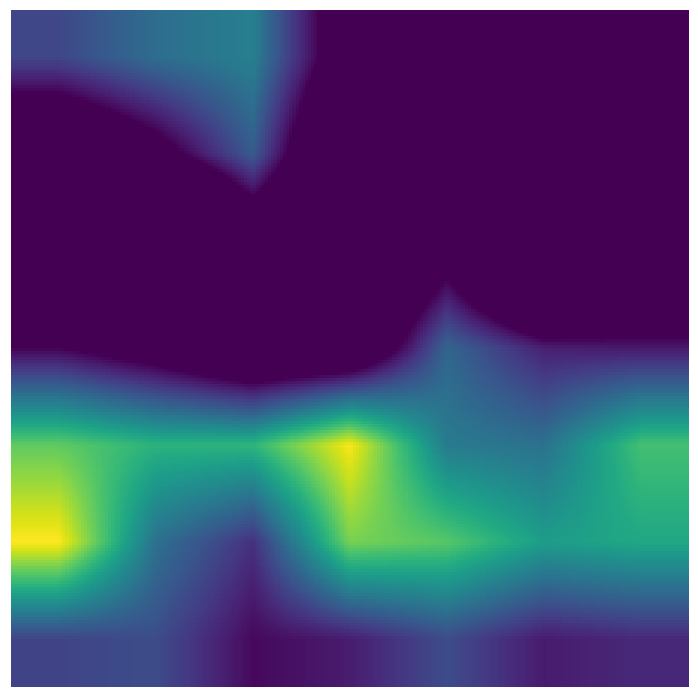

In [86]:
mm = model._modules['features']
mc = model._modules['classifier']
am = mm(x_)
# print(am.shape) # torch.Size([1, 1024, 7, 7])

am = am.data.cpu().numpy()[0]
am = np.mean(am, axis=0) 
am = cv2.resize(am, (224, 224))
# print('HERE', np.min(am), np.max(am))
am = np.maximum(am, 0)
# print('HERE', np.min(am), np.max(am))
am = (am - np.min(am)) / (np.max(am) - np.min(am))  # Normalize between 0-1
# print('HERE', np.min(am), np.max(am))
am = np.uint8(am * 255)  # Scale between 0-255 to visualize
# print('HERE', np.min(am), np.max(am))
plot_im(am)

In [193]:
# for module_pos, module in model.features._modules.items():
#     print(module_pos, module)
for block_name, block in model._modules.items():
    print(block_name)
    for block_name_, block_ in block._modules.items():
        print(block_name, block_name_)

features
features conv0
features norm0
features relu0
features pool0
features denseblock1
features transition1
features denseblock2
features transition2
features denseblock3
features transition3
features denseblock4
features norm5
classifier


In [205]:
model._modules['classifier']

Linear(in_features=1024, out_features=2, bias=True)

In [81]:
import cv2
import numpy as np
import torch

from misc_functions import get_params, save_class_activation_on_image

class CamExtractor():
    """
        Extracts cam features from the model
    """
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None

    def save_gradient(self, grad):
        self.gradients = grad

    def forward_pass_on_convolutions(self, x):
        """
            Does a forward pass on convolutions, hooks the function at given layer
        """
        conv_output = None
        for module_pos, module in self.model.features._modules.items():
            x = module(x)  # Forward
            if int(module_pos) == self.target_layer:
                x.register_hook(self.save_gradient)
                conv_output = x  # Save the convolution output on that layer
        return conv_output, x

    def forward_pass(self, x):
        """
            Does a full forward pass on the model
        """
        # Forward pass on the convolutions
        conv_output, x = self.forward_pass_on_convolutions(x)
        x = x.view(x.size(0), -1)  # Flatten
        # Forward pass on the classifier
        x = self.model.classifier(x)
        return conv_output, x # output of the layer & output of the network

class GradCam():
    """
        Produces class activation map
    """
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        # Define extractor
        self.extractor = CamExtractor(self.model, target_layer)

    def generate_cam(self, input_image, target_index=None):
        # Full forward pass
        # conv_output: output of convolutions at specified layer
        # model_output: final output of the model (1, 1000)
        conv_output, model_output = self.extractor.forward_pass(input_image)

        print(conv_output.shape, model_output.shape)
        # Layer: 0
        # torch.Size([1, 64, 55, 55]) torch.Size([1, 1000])
        
        # if no label is provided
        if target_index is None: target_index = np.argmax(model_output.data.numpy())
        
        # Target for backprop: labeling
        one_hot_output = torch.FloatTensor(1, model_output.size()[-1]).zero_()
        one_hot_output[0][target_index] = 1
        
        # Zero grads: reset gradients
        self.model.features.zero_grad()
        self.model.classifier.zero_grad()
        
        # Backward pass with specified target
        model_output.backward(gradient=one_hot_output, retain_graph=True)

        # Get hooked gradients (on the specific layer)
        guided_gradients = self.extractor.gradients.data.numpy()[0]
        print('guided_gradients: ', np.min(guided_gradients), np.max(guided_gradients))
        print('guided_gradients: ', guided_gradients.shape)
        # guided_gradients: (64, 55, 55)

        # Get convolution outputs: activation map
        target = conv_output.data.numpy()[0]
        print('am', np.min(target), np.max(target))
        
        # Get weights from gradients
        weights = np.mean(guided_gradients, axis=(1, 2))  # Take averages for each gradient
        print('weights (mean of gradients)', np.min(weights), np.max(weights))

        print('weights shape: ', weights.shape)
        # weights shape:  (64,)
            
        # Create empty numpy array for cam
        cam = np.ones(target.shape[1:], dtype=np.float32)
        
        print('HERE input_image: ', np.min(input_image.data.numpy()), np.max(input_image.data.numpy()))
        print('HERE gradients: ', np.min(guided_gradients), np.max(guided_gradients))
        print('HERE am: ', np.min(target), np.max(target))
        print('HERE weights: ', np.min(weights), np.max(weights))
        
        print('cam shape: ', cam.shape)
        # cam shape:  (55, 55)
        # Multiply each weight with its conv output and then, sum
        for i, w in enumerate(weights):
            cam += w * target[i, :, :]
        print('cam (mean of gradients * am): ', np.min(cam), np.max(cam))

        print('cam shape: ', cam.shape)
        # cam shape:  (55, 55)
        cam = cv2.resize(cam, (224, 224))
        print('cam (mean of gradients * am): ', np.min(cam), np.max(cam))

        cam = np.maximum(cam, 0)
        print('cam (mean of gradients * am): ', np.min(cam), np.max(cam))
        
        cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam))  # Normalize between 0-1
        print('cam (mean of gradients * am): ', np.min(cam), np.max(cam))
        
        cam = np.uint8(cam * 255)  # Scale between 0-255 to visualize
        print('cam (mean of gradients * am): ', np.min(cam), np.max(cam))
        
        print('cam shape: ', cam.shape)
        # cam shape:  (224, 224)
        return cam

# target_example = 0  # Snake
# (original_image, prep_img, target_class, file_name_to_export, pretrained_model) = get_params(target_example)

# grad_cam = GradCam(pretrained_model, target_layer=11)
# cam = grad_cam.generate_cam(prep_img, target_class)
# save_class_activation_on_image(original_image, cam, file_name_to_export)
# print('Grad cam completed')

In [ ]:
gradients = {}
def save_gradient(layer_name): 
    def save(grad):
        gradients[layer_name] = grad
    return save


x = input_D
conv_output = None
for block_name, block in model._modules.items():
    for module_pos, module in block._modules.items():
        if block_name[:6] == 'scale1':
#             print(block_name[:6], module_pos)
            x = module(x)
            if block_name == 'scale1_layer0' and module_pos == '0':
                x.register_hook(save_gradient(block_name))
                x.retain_grad(); print(x.grad)
                conv_output = x  # Save the convolution output on that layer
                print(block_name, module_pos, module)

# x = x.view(x.size(0), -1)  # Flatten
# print(x.shape)
# Forward pass on the classifier
# x = self.model.classifier(x)
                
# print(x.shape, x, conv_output.shape)

label_code = 1.0
label = torch.FloatTensor(x.size()).fill_(label_code)
label = Variable(label, requires_grad=True)

x.backward(gradient=label, retain_graph=True)
gradients = gradients['scale1_layer0'].data.numpy()[0]

print(gradients.shape, x.shape, conv_output.shape)
# (512,34,34)

## CAM
am = conv_output.data.numpy()[0]
print('activation map shape: ', am.shape)
# activation map shape: (512, 34, 34)
weights = np.mean(gradients, axis=(1, 2))  
print('weights shape: ', weights.shape)
# weights shape:  (512,)            
cam = np.ones(am.shape[1:], dtype=np.float32)
print('cam shape: ', cam.shape)
# cam shape: (34, 34)

print('HERE output: ', np.min(output), np.max(output))
print('HERE input_image: ', np.min(input_D.data.numpy()), np.max(input_D.data.numpy()))
print('HERE gradients: ', np.min(gradients), np.max(gradients))
print('HERE am: ', np.min(am), np.max(am))
print('HERE weights: ', np.min(weights), np.max(weights))

# multiply each weight with its conv output and then, sum
for i, w in enumerate(weights):
    cam += w * am[i, :, :]
#     print('HERE update to cam', w, np.min(w * am[i, :, :]), np.max(w * am[i, :, :]))
#     print('HERE', np.min(cam), np.max(cam))
    
cam = cv2.resize(cam, (224, 224))
print('HERE', np.min(cam), np.max(cam))
cam = np.maximum(cam, 0)
print('HERE', np.min(cam), np.max(cam))
cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam))  # Normalize between 0-1
print('HERE', np.min(cam), np.max(cam))
cam = np.uint8(cam * 255)  # Scale between 0-255 to visualize
print('HERE', np.min(cam), np.max(cam))

# print('cam shape: ', cam.shape)
# cam shape:  (224, 224)


# upsample = nn.Upsample(scale_factor=4, mode = "bilinear")

# x = upsample(x); print(x.shape)
# x = upsample(x); print(x.shape)
# x = x.data.numpy()[0][0]

# HERE input_image:  -2.1179 2.64
# HERE gradients:  -0.0564731 0.0814772
# HERE am:  0.0 29.8777
# HERE weights:  -0.000524517 0.000851275

am = np.mean(am, axis=0) 
am = cv2.resize(am, (224, 224))

print('HERE', np.min(am), np.max(am))
am = np.maximum(am, 0)
print('HERE', np.min(am), np.max(am))
am = (am - np.min(am)) / (np.max(am) - np.min(am))  # Normalize between 0-1
print('HERE', np.min(am), np.max(am))
am = np.uint8(am * 255)  # Scale between 0-255 to visualize
print('HERE', np.min(am), np.max(am))
plot_ims([am, cam])

In [165]:
label_code = 1.0
label = torch.FloatTensor(torch.zeros((1, 1))).fill_(label_code)
label = Variable(label, requires_grad=True)
label

Variable containing:
 1
[torch.FloatTensor of size 1x1]

In [166]:
torch.ones((1, 1))


 1
[torch.FloatTensor of size 1x1]

In [168]:
label = Variable(torch.zeros((1, 1)))
y_ = label.data.long()
y = y_.view(len(y_), 1)
y_onehot = torch.cuda.FloatTensor(len(y), 2).zero_().scatter_(1, y, 1)
label_onehot = Variable(y_onehot).cuda()
label_onehot

TypeError: scatter_ received an invalid combination of arguments - got (int, torch.LongTensor, int), but expected one of:
 * (int dim, torch.cuda.LongTensor index, float value)
      didn't match because some of the arguments have invalid types: ([32;1mint[0m, [31;1mtorch.LongTensor[0m, [32;1mint[0m)
 * (int dim, torch.cuda.LongTensor index, torch.cuda.FloatTensor src)
      didn't match because some of the arguments have invalid types: ([32;1mint[0m, [31;1mtorch.LongTensor[0m, [31;1mint[0m)


In [182]:
# Variable(torch.ones((1, 2))).cuda()
t = torch.nn.functional.sigmoid(Variable(torch.FloatTensor([[-100.40931702, -82.76070404]])))

In [8]:
import sys, os
sys.path.append(os.getcwd())
import torch
from torchvision import models
inputs = torch.randn(1,3,224,224)
resnet18 = models.resnet18()
y = resnet18(Variable(inputs))
# print(y)

g = make_dot(y, resnet18.state_dict())
g.view()

NameError: name 'Variable' is not defined

NameError: name 'model' is not defined